<a href="https://colab.research.google.com/github/karri-ten/breast_cancer_dataset/blob/main/breat_cancer_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing

In [79]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pprint

In [82]:
df = pd.read_csv('/content/breast-cancer.csv')
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [86]:
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [87]:
df.describe(include = 'number')

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [88]:
df.describe(include = 'object')

,diagnosis
count,569
unique,2
top,B
freq,357


In [89]:
df['diagnosis'].nunique()

2

In [90]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
564,False
565,False
566,False
567,False


In [91]:
df.drop('id', axis=1, inplace= True)

##SELECTION

In [92]:
x = df.drop('diagnosis',axis=1)
y =df['diagnosis']

In [95]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size= 0.2, random_state = 42)

In [96]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
model = DecisionTreeClassifier(ccp_alpha=0, max_depth=4 , random_state= 42 )
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.9473684210526315
[[68  3]
 [ 3 40]]


In [97]:
model.get_params()

{'ccp_alpha': 0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}

In [98]:
print(classification_report(y_test, y_pred, target_names=['M', 'B']))

              precision    recall  f1-score   support

           M       0.96      0.96      0.96        71
           B       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [99]:
model.feature_importances_

array([0.        , 0.03139487, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.70458252, 0.        , 0.        ,
       0.        , 0.00639525, 0.        , 0.01221069, 0.        ,
       0.        , 0.0189077 , 0.0162341 , 0.        , 0.        ,
       0.05329492, 0.02819607, 0.05247428, 0.        , 0.00940897,
       0.        , 0.        , 0.06690062, 0.        , 0.        ])

In [100]:
features_names = x.columns
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

                    Feature  Importance
7       concave points_mean    0.704583
27     concave points_worst    0.066901
20             radius_worst    0.053295
22          perimeter_worst    0.052474
1              texture_mean    0.031395
21            texture_worst    0.028196
16             concavity_se    0.018908
17        concave points_se    0.016234
13                  area_se    0.012211
24         smoothness_worst    0.009409
11               texture_se    0.006395
23               area_worst    0.000000
18              symmetry_se    0.000000
25        compactness_worst    0.000000
19     fractal_dimension_se    0.000000
26          concavity_worst    0.000000
28           symmetry_worst    0.000000
0               radius_mean    0.000000
15           compactness_se    0.000000
14            smoothness_se    0.000000
12             perimeter_se    0.000000
10                radius_se    0.000000
9    fractal_dimension_mean    0.000000
8             symmetry_mean    0.000000


In [102]:
features_to_keep = feature_importance_df[feature_importance_df['Importance'] > 0.009409]['Feature'].tolist()
features_to_keep

['concave points_mean',
 'concave points_worst',
 'radius_worst',
 'perimeter_worst',
 'texture_mean',
 'texture_worst',
 'concavity_se',
 'concave points_se',
 'area_se']

In [103]:
x  = x[features_to_keep]
y = df['diagnosis']

In [104]:
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state= 42)


In [105]:
model = DecisionTreeClassifier(ccp_alpha=0, max_depth=4 , random_state= 42 )
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.956140350877193
[[69  2]
 [ 3 40]]


<Axes: xlabel='Feature'>

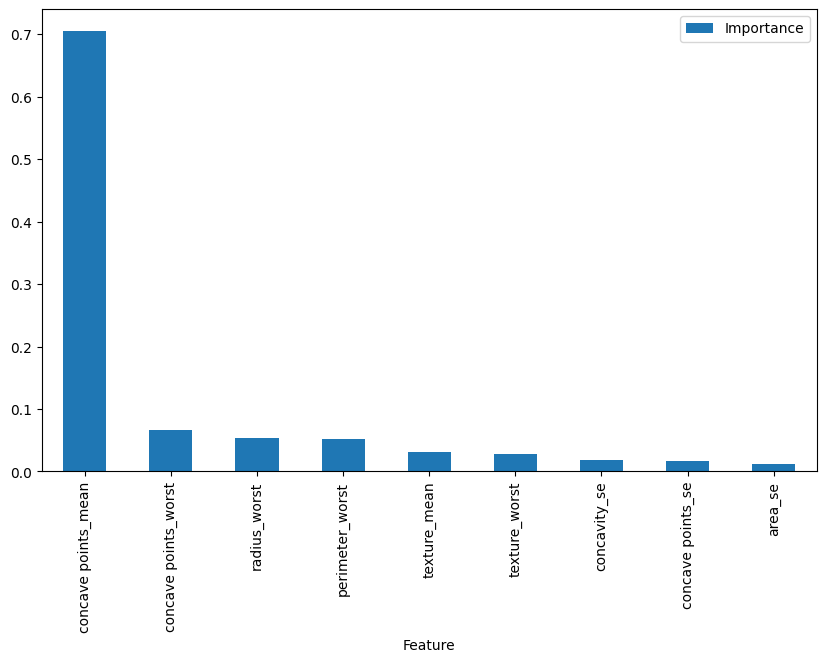

In [107]:
feature_importance_df.head(9).plot(kind='bar', x='Feature', y='Importance', figsize=(10, 6))

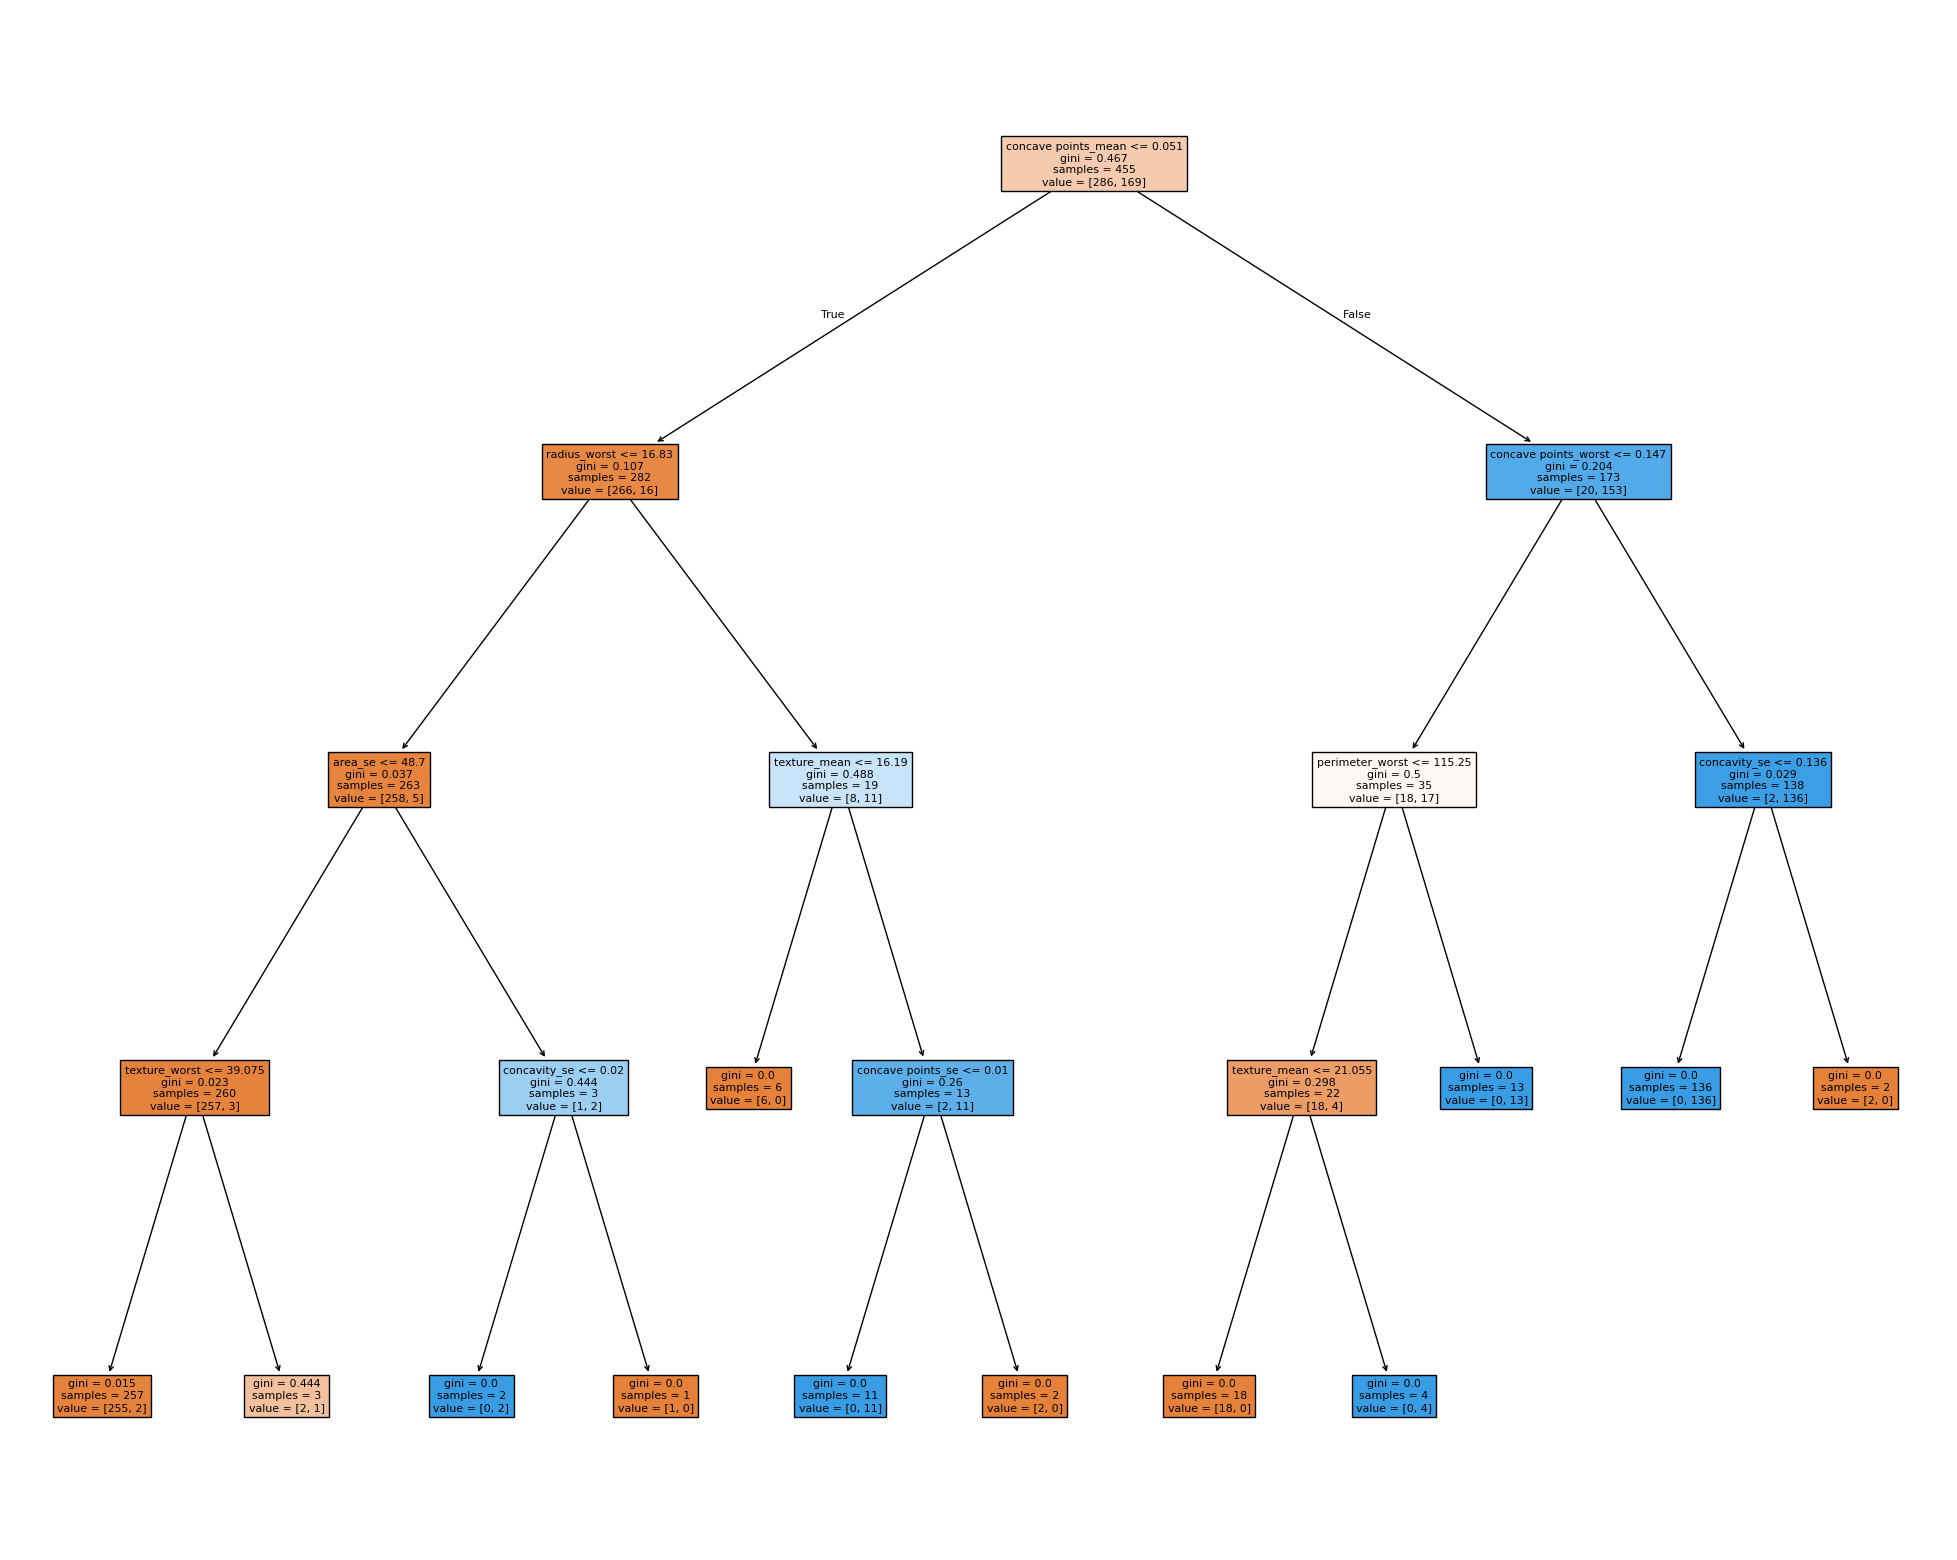

In [111]:
from sklearn import tree

fig= plt.figure(figsize=(25,20))
tree.plot_tree(model, feature_names=x.columns, filled=True)
plt.show()